In [36]:
import pandas as pd
from sklearn import datasets 

In [37]:
data = datasets.load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

X = data.data #input 

y = data.target #output

df.to_csv('diabetes_data.csv', index = False)
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

### data preprocessing : clean the data, convert the categorical (text) to numerical values
### input to ML model must be number. (X - input, y- output) 

#### Step 1: split the data into training and testing set (to avoid overfit)

#### Step 2: train ML model using the available training set

#### Step 3: evaluate the performance for the training set, testing set 

#### Step 4: fine-tune parameters to balance the performance 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline



In [42]:
def my_linear_regression(X_train,y_train):
    
    steps = [("imp_mean", SimpleImputer()), # cleaning the data - replace the missing data with average
            ("scale", StandardScaler()),  #standardizing the data 
            ("linear", LinearRegression()) ] # linear model - ML 

    pipeline = Pipeline(steps)

    model = pipeline.fit(X_train, y_train)
 

    linear_regressor = pipeline.named_steps['linear']

    return model, linear_regressor.intercept_, linear_regressor.coef_

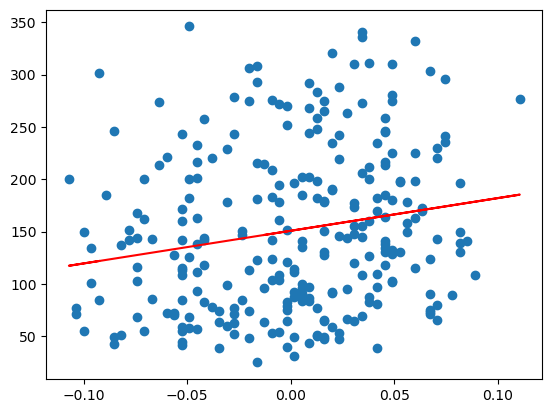

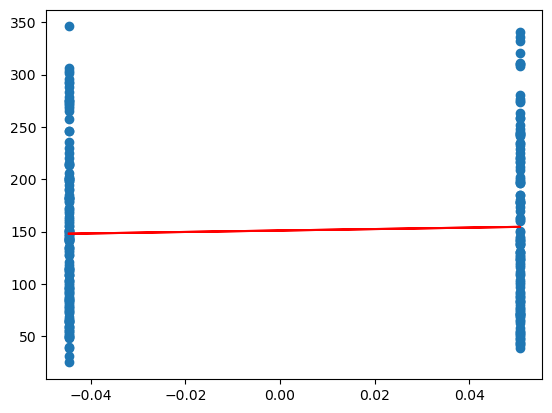

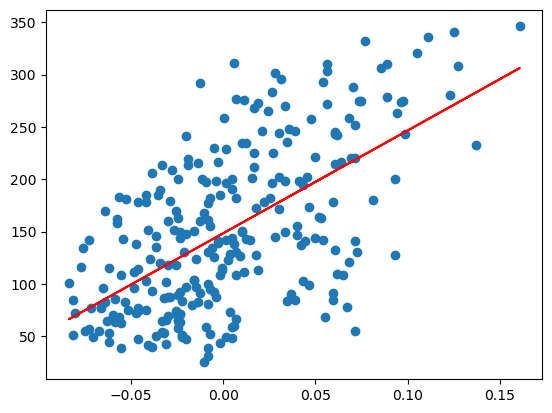

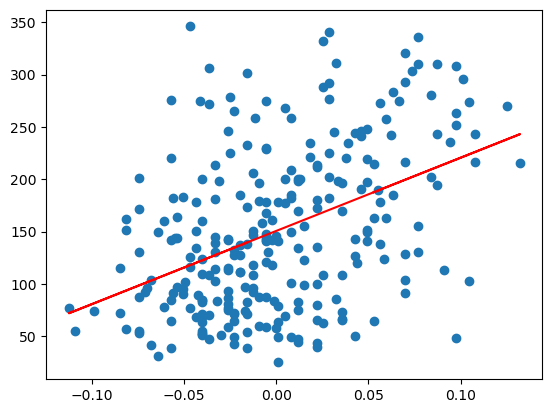

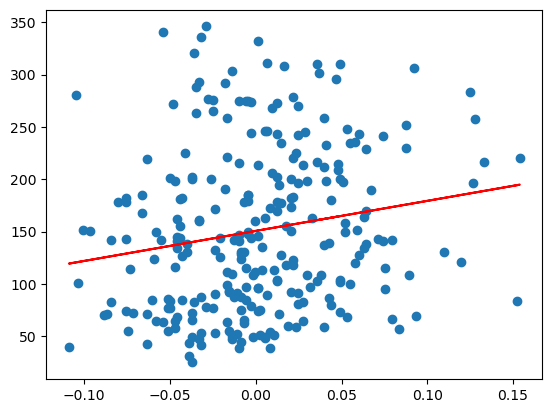

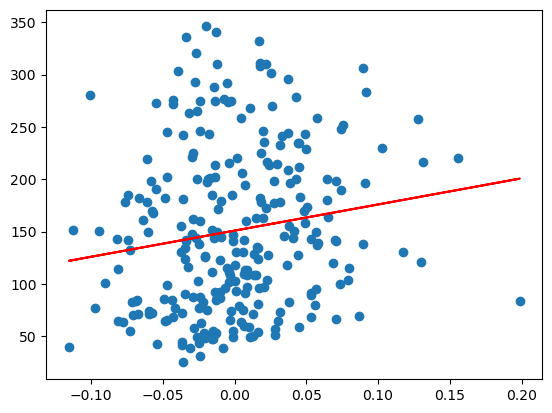

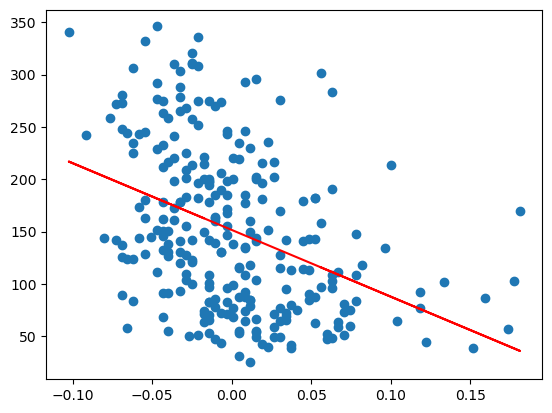

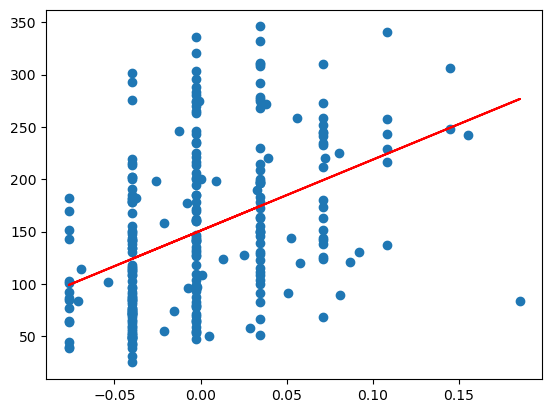

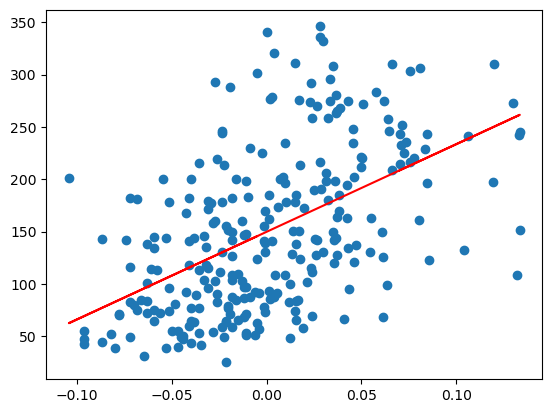

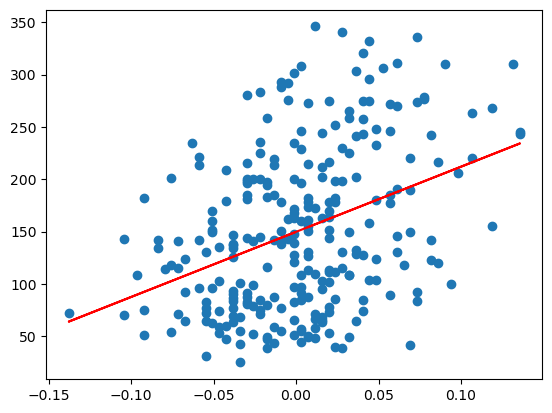

,coef
age,14.674768
sex,3.284119
bmi,46.949899
bp,33.599098
s1,13.814511
s2,11.950290
s3,-30.810016
s4,32.419228
s5,39.933342
s6,29.223907


In [43]:
import matplotlib.pyplot as plt

df_slr = {}
for input in df.columns:
    X = df[[input]].values
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)
    model, a, b = simple_linear_regression(X_train,y_train) 
    y_pred = model.predict(X_train)    
    plt.scatter(X_train, y_train, label='Data Points')
    plt.plot(X_train, y_pred, color='red', label='Linear Regression')
    plt.show()   
    df_slr[input] = b[0]

df_simple = pd.DataFrame.from_dict(df_slr, orient ='index')
df_simple.columns = ['coef']

df_simple

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df[['bmi']].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)
model, a, b = my_linear_regression(X_train,y_train) 
y_pred = model.predict(X_train) 
    
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train,y_pred)
print('training')
print('mae:', round(mae), 'mse:', round(mse), 'r2 score:', round(r2, 2))

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print('testing')
print('mae:', round(mae), 'mse:', round(mse), 'r2 score:', round(r2, 2))

training
mae: 51 mse: 3776 r2 score: 0.37
testing
mae: 52 mse: 4100 r2 score: 0.3
